In [1]:
%%capture
pip install plotly pandas statsmodels kaleido scipy nbformat jinja2
#file_path = '/home/rami/torte/output/kconfig/output.csv'

In [5]:
pip install tabulate


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
from tabulate import tabulate
import pandas as pd

# Datei einlesen
file_configfixextractor = '/home/rami/torte/output/kconfig/output.csv'
df = pd.read_csv(file_configfixextractor)

# Relevante Spalten auswählen
df_filtered = df[['system','revision','model-file', 'model-time']]

# Alle Zeilen anzeigen
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Tabelle mit Tabulate darstellen
print(tabulate(df_filtered, headers='keys', tablefmt='grid'))


+-----+------------+------------------------------------------+----------------------------------------------------------+---------------+
|     | system     | revision                                 | model-file                                               |    model-time |
+=====+============+==========================================+==========================================================+===============+
|   0 | toybox     | 0.0.1                                    | nan                                                      | nan           |
+-----+------------+------------------------------------------+----------------------------------------------------------+---------------+
|   1 | toybox     | 0.0.2                                    | nan                                                      |   5.996e+08   |
+-----+------------+------------------------------------------+----------------------------------------------------------+---------------+
|   2 | toybox     | 0.0.3 

In [8]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 562.9 kB/s eta 0:00:001m610.6 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


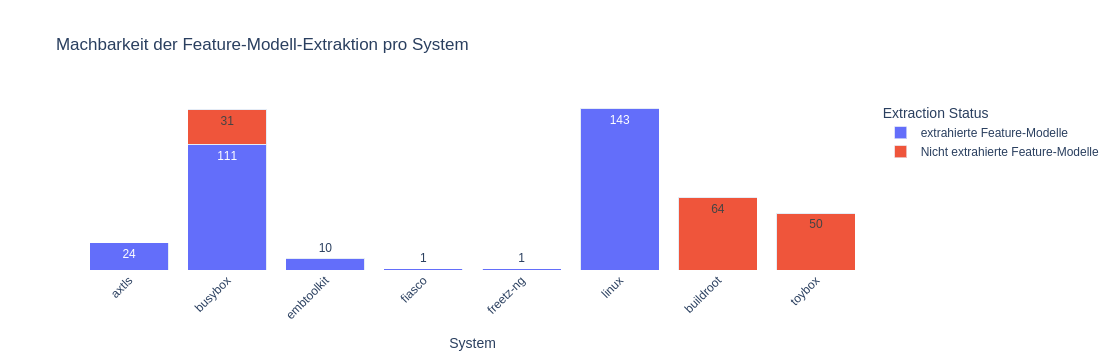

In [73]:
import pandas as pd
import plotly.express as px

# Datei einlesen
file_configfixextractor = '/home/rami/torte/output/kconfig/output.csv'
df = pd.read_csv(file_configfixextractor)

# Konvertiere die Zeit in numerische Werte
df['model-time'] = pd.to_numeric(df['model-time'], errors='coerce')

# Konvertiere die 'model-time' von Millisekunden in Minuten
df['model-time-minutes'] = df['model-time'] / 60000  # Zeit in Minuten umrechnen

# Status basierend auf den vorhandenen Werten für 'model-file' und 'model-time'
df['status'] = df.apply(
    lambda row: 'extrahierte Feature-Modelle' if pd.notna(row['model-file']) and pd.notna(row['model-time']) else 'Nicht extrahierte Feature-Modelle',
    axis=1
)

# Zusammenfassung der Anzahl der 'status' pro 'system'
df_summary = df.groupby(['system', 'status']).size().reset_index(name='count')

# Balkendiagramm
fig_bar = px.bar(
    df_summary,
    x='system',
    y='count',
    color='status',
    title='Machbarkeit der Feature-Modell-Extraktion pro System',
    labels={'count': '', 'system': 'System', 'status': 'Status'},
    text='count',  
)

fig_bar.update_layout(
    xaxis_title='System',
    legend_title='Extraction Status',
    xaxis_tickangle=-45,
    barmode='stack',  
    plot_bgcolor='white',  
    paper_bgcolor='white',
    yaxis=dict(
        showticklabels=False,  
        showgrid=False         
    )
)

fig_bar.show()


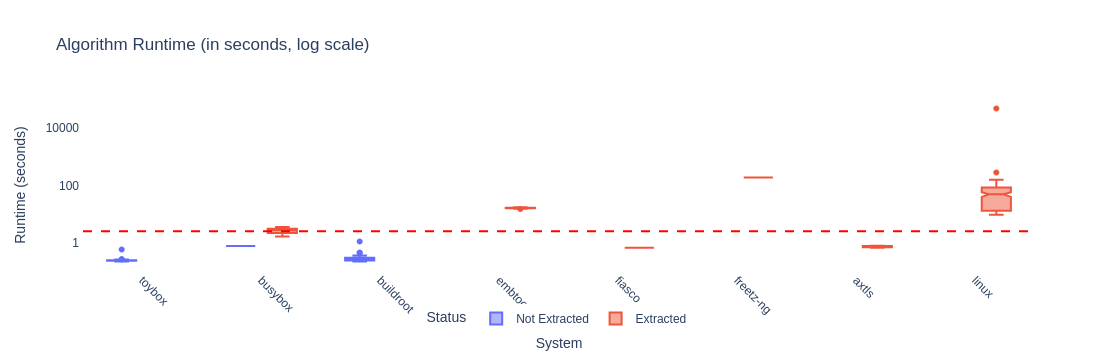

In [72]:
import pandas as pd
import plotly.express as px

# Datei einlesen
file_configfixextractor = '/home/rami/torte/output/kconfig/output.csv'
df = pd.read_csv(file_configfixextractor)

# Konvertiere die Zeit in numerische Werte und in Sekunden
df['model-time'] = pd.to_numeric(df['model-time'], errors='coerce')
df['model-time-seconds'] = df['model-time'] / 1e9  # Zeit von Nanosekunden in Sekunden umrechnen

# Status basierend auf den vorhandenen Werten für 'model-file' und 'model-time'
df['status'] = df.apply(
    lambda row: 'Extracted' if pd.notna(row['model-file']) and pd.notna(row['model-time']) else 'Not Extracted',
    axis=1
)

# Median für die Mittellinie berechnen
median = df['model-time-seconds'].median()

# Boxplot mit Plotly Express
fig = px.box(
    df,
    x='system',  # Systeme auf der X-Achse
    y='model-time-seconds',  # Zeit in Sekunden auf der Y-Achse
    color='status',  # Farben für Status ('Extracted' vs. 'Not Extracted')
    title='Algorithm Runtime (in seconds, log scale)',
    labels={
        'system': 'System',
        'model-time-seconds': 'Runtime (seconds)',
        'status': 'Extraction Status'
    },
    notched=True  # Kerben im Boxplot aktivieren
)

# Mittellinie hinzufügen
fig.add_shape(
    type="line",
    x0=-0.5,  # Anfang der Linie (leicht außerhalb der Achse)
    x1=len(df['system'].unique()) - 0.5,  # Dynamisches Ende basierend auf Anzahl Systeme
    y0=median,
    y1=median,
    line=dict(color="red", width=2, dash="dash"),
    xref="x",
    yref="y"
)

# Layout anpassen - Logarithmische Y-Achse mit definierten Ticks
fig.update_layout(
    yaxis=dict(
        title='Runtime (seconds)',
        type='log',  # Logarithmische Skalierung
        tickmode='array',  # Benutze spezifische Tick-Werte
        tickvals=[0.1, 1, 100, 10000],  # Definierte Tick-Werte
        ticktext=['0.1', '1', '100', '10000'],  # Tick-Beschriftungen
        showgrid=True,  # Zeige Gitterlinien
        zeroline=False  # Entferne Null-Linie
    ),
    xaxis=dict(
        title='System',  # Titel für die X-Achse
        tickangle=45  # Leichte Neigung der X-Achsen-Beschriftungen
    ),
    plot_bgcolor='white',  # Weißer Hintergrund für das Diagramm
    paper_bgcolor='white',  # Weißer Hintergrund für die gesamte Fläche
    legend=dict(
        title='Status',
        orientation='h',  # Horizontale Anordnung der Legende
        x=0.5,  # Zentrierte Position der Legende
        xanchor='center',
        y=-0.2
    )
)

# Diagramm anzeigen
fig.show()
